<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week03/Day3/EX3/W3D3EXG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercises XP Gold
Last Updated: October 16th, 2024

What you will learn
Perform scaling and normalization on numerical features in the Titanic dataset.
Create new composite features in the Titanic dataset to enhance the data analysis.
Apply Min-Max normalization to the ‘Sales’ and ‘Profit’ columns in an E-Commerce dataset.
Aggregate daily air quality measurements to monthly averages.


What you will create
A version of the Titanic dataset with ‘Fare’ and ‘Age’ columns scaled and normalized.
A transformed Titanic dataset featuring new composite attributes like ‘Family Size’ and ‘IsAlone’.
A version of the Titanic dataset with ‘Age’ and ‘Fare’ columns normalized using Min-Max and Z-score normalization.
A Superstore Sales dataset with ‘Sales’ and ‘Profit’ columns normalized using Min-Max normalization.
The Air Quality dataset grouped by location and month, with average key measurements calculated for each month.


Exercise 1: Data Scaling and Normalization
Instructions
Identify numerical columns in the dataset like ‘Fare’ and ‘Age’.
Apply standardization (Z-score scaling) to features with a Gaussian distribution.
Apply Min-Max normalization to features that require bounded ranges.
Analyze the effect of scaling and normalization on model performance.
Hint: Use StandardScaler and MinMaxScaler from scikit-learn.



Exercise 2: Creating Composite Features
Instructions
Create a new feature, ‘Family Size’, by combining ‘SibSp’ (siblings and spouses) and ‘Parch’ (parents and children).
Create a ‘IsAlone’ feature to indicate whether a passenger is traveling alone.
Explore the relationship between these new features and the survival rate.
Hint: Use basic arithmetic operations and conditional statements in Pandas.



Exercise 3: Data Normalization on the Titanic Dataset
Instructions
Import the titanic dataset using Pandas in Python.
Apply Min-Max normalization and Z-score normalization to these columns : Age and Fare
Compare the distributions before and after normalization using histograms.


Exercise 4 : Data Reduction and Aggregation
Instructions
Perform data reduction on the titanic dataset by implementing dimensionality reduction techniques like Principal Component Analysis (PCA).
Aggregate the data by a categorical column (like date or region) and calculate summary statistics (mean, sum, etc.).
Visualize the aggregated data using appropriate plots.


Exercise 5: Normalizing E-Commerce Sales Data
Instructions
Dataset: Use the Superstore Sales Data.

Load the Superstore Sales dataset.
Perform Min-Max normalization on the ‘Sales’ and ‘Profit’ columns.
Create new columns, e.g., ‘Sales_normalized’ and ‘Profit_normalized’, to store the normalized values.


Exercise 6: Aggregating Air Quality Data
Instructions
Dataset: Use the Air Quality Data in India.

Load the Air Quality dataset.
Convert the ‘Date’ column to a datetime format.
Group the data by location and month, calculating the average of key measurements (e.g., PM2.5, PM10, NO2) for each month.
Store the aggregated data in a new DataFrame and analyze trends in air quality over time.


👩‍🏫 What You Will Learn
Perform normalization and standardization on numerical data

Engineer new composite features

Normalize E-commerce data for analysis

Aggregate time series data by month

Reduce dimensions using PCA and group categorical data

What you will create

| Output                      | Description                                           |
| --------------------------- | ----------------------------------------------------- |
| Scaled Titanic Dataset      | Normalized `Fare` and `Age` using Z-score and Min-Max |
| Composite Titanic Dataset   | New features: `FamilySize`, `IsAlone`                 |
| Superstore Sales Dataset    | Normalized `Sales` and `Profit`                       |
| Aggregated Air Quality Data | Monthly location-wise air quality averages            |


# Exercise 1: Data Scaling and Normalization (Titanic Dataset)

Instructions
 - Identify numerical columns in the dataset like ‘Fare’ and ‘Age’.
 - Apply standardization (Z-score scaling) to features with a Gaussian distribution.
 - Apply Min-Max normalization to features that require bounded ranges.
 - Analyze the effect of scaling and normalization on model performance.


 Hint: Use StandardScaler and MinMaxScaler from scikit-learn.


Identify Numerical Columns

Start by loading the dataset and checking which columns are numerical.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')  # Replace with actual file

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


Check Distributions

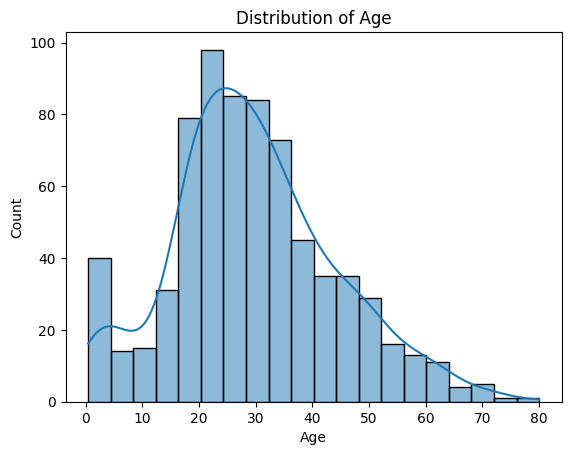

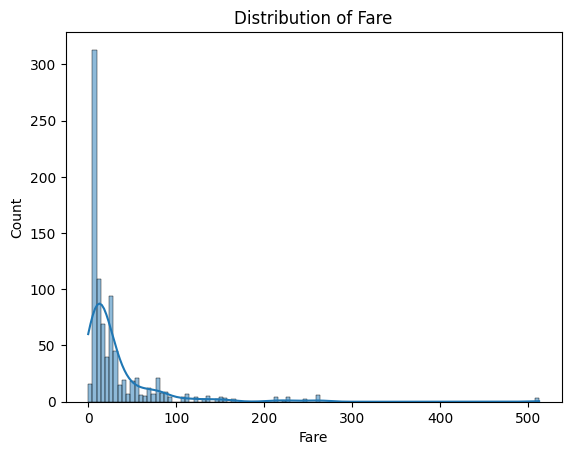

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution
for col in ['Age', 'Fare']:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


If the histogram looks bell-shaped, use StandardScaler.

If not, consider MinMaxScaler, especially if the feature needs to be in a fixed range like [0, 1].

Apply Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Example: If Age ==> Gaussian → StandardScaler, Fare ==> Skewed → MinMaxScaler
df_scaled = df.copy()

# Apply StandardScaler to Age
df_scaled['Age_scaled'] = standard_scaler.fit_transform(df[['Age']])

# Apply MinMaxScaler to Fare
df_scaled['Fare_scaled'] = minmax_scaler.fit_transform(df[['Fare']])


Compare Model Performance (Before vs After Scaling)

Use a simple model like Logistic Regression or Random Forest and compare accuracy or F1 score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target
features = ['Age', 'Fare']  # Original
features_scaled = ['Age_scaled', 'Fare_scaled']  # Scaled
target = 'Survived'

# Drop rows with missing values for simplicity
df_clean = df_scaled.dropna(subset=features + [target])

X = df_clean[features]
X_scaled = df_clean[features_scaled]
y = df_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train models
model_raw = LogisticRegression()
model_scaled = LogisticRegression()

model_raw.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train)

# Evaluate
y_pred_raw = model_raw.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

print("Accuracy (Raw):", accuracy_score(y_test, y_pred_raw))
print("Accuracy (Scaled):", accuracy_score(y_test, y_pred_scaled))


Accuracy (Raw): 0.6293706293706294
Accuracy (Scaled): 0.6293706293706294


#Exercise 2: Creating Composite Features

Instructions
- Create a new feature, ‘Family Size’, by combining ‘SibSp’ (siblings and spouses) and ‘Parch’ (parents and children).
- Create a ‘IsAlone’ feature to indicate whether a passenger is traveling alone.
- Explore the relationship between these new features and the survival rate.

Hint: Use basic arithmetic operations and conditional statements in Pandas.
Composite Features (Titanic Dataset):
Create FamilySize = SibSp + Parch + 1
Create IsAlone = 1 if FamilySize == 1, else 0
Explore correlation with Survived

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

# Composite features
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Analyze relationship
print(df.groupby('IsAlone')['Survived'].mean())
print(df.groupby('FamilySize')['Survived'].mean())


IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


#Exercise 3: Data Normalization on the Titanic Dataset

Instructions

- Import the titanic dataset using Pandas in Python.
- Apply Min-Max normalization and Z-score normalization to these columns : Age and Fare
- Compare the distributions before and after normalization using histograms.

Import the Titanic Dataset

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df4 = pd.read_csv('Titanic-Dataset.csv')

Handle Missing Values (if any)
- drop rows with missing `age` or `fare` for simplicity.

Check column names

In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'IsAlone'],
      dtype='object')


In [ ]:
df_clean = df[['Age', 'Fare']].dropna()

Apply Min-Max and Z-Score Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Initialize scalers
minmax = MinMaxScaler()
zscore = StandardScaler()

# Apply Min-Max Normalization
df_clean['Age_minmax'] = minmax.fit_transform(df_clean[['Age']])
df_clean['Fare_minmax'] = minmax.fit_transform(df_clean[['Fare']])

# Apply Z-score Normalization
df_clean['Age_zscore'] = zscore.fit_transform(df_clean[['Age']])
df_clean['Fare_zscore'] = zscore.fit_transform(df_clean[['Fare']])

Plot Histograms — Before vs After Normalization

In [ ]:
import matplotlib.pyplot as plt

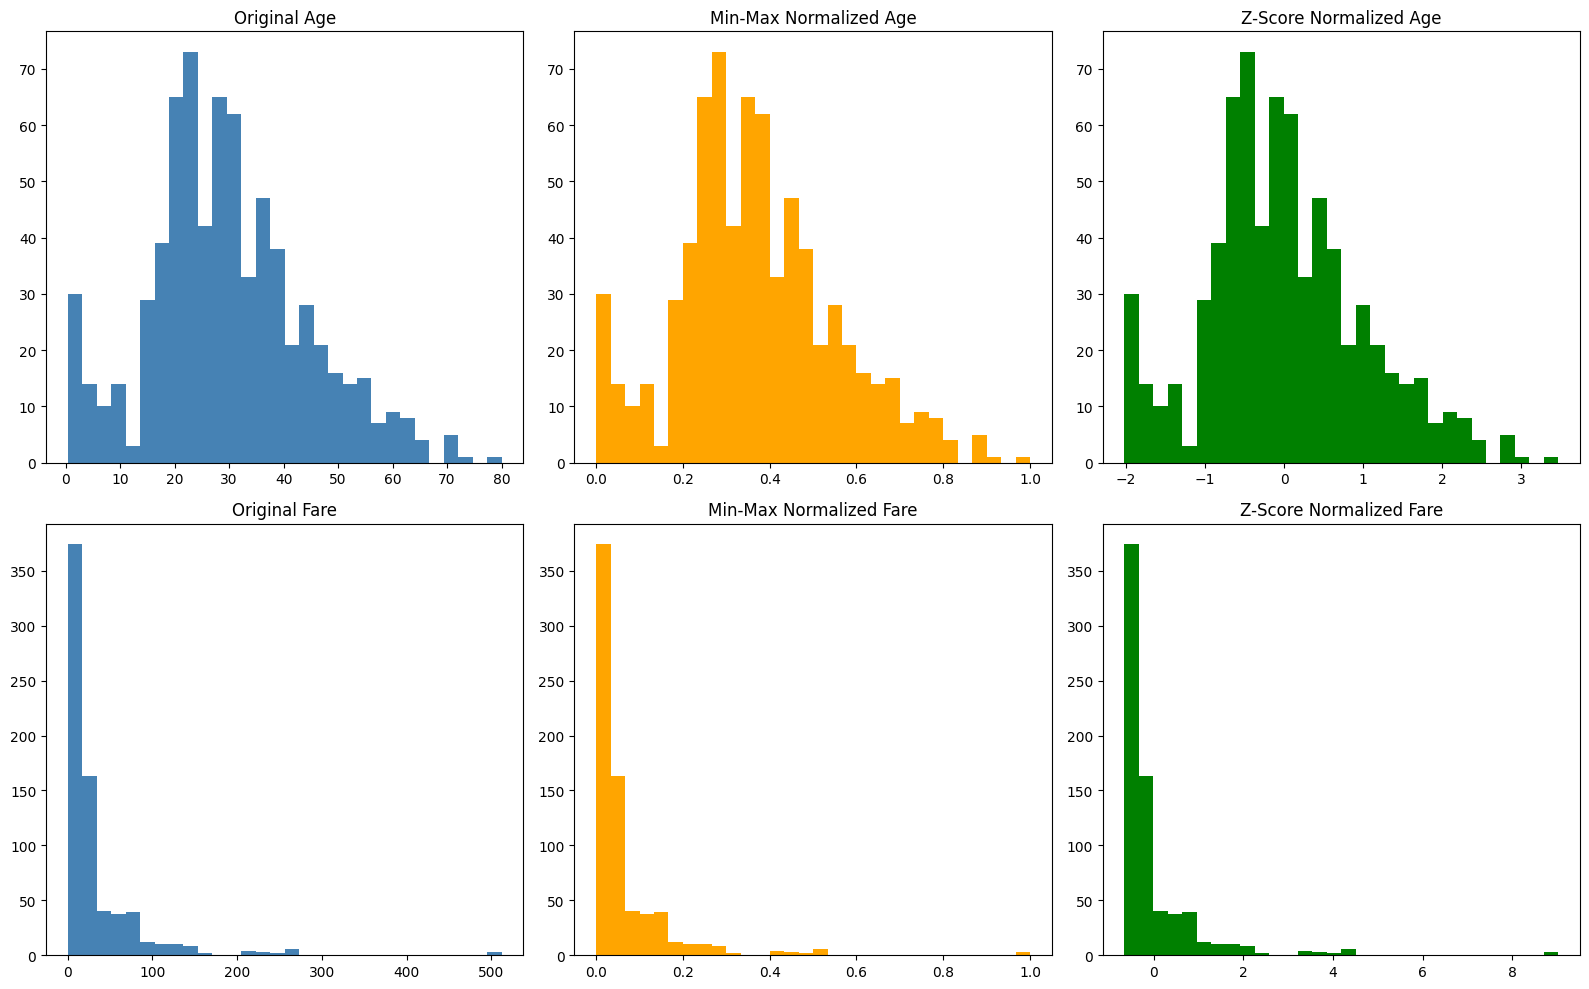

In [ ]:
# Plot settings
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Age - Original, Min-Max, Z-score
axes[0, 0].hist(df_clean['Age'], bins=30, color='steelblue')
axes[0, 0].set_title('Original Age')

axes[0, 1].hist(df_clean['Age_minmax'], bins=30, color='orange')
axes[0, 1].set_title('Min-Max Normalized Age')

axes[0, 2].hist(df_clean['Age_zscore'], bins=30, color='green')
axes[0, 2].set_title('Z-Score Normalized Age')

# Fare - Original, Min-Max, Z-score
axes[1, 0].hist(df_clean['Fare'], bins=30, color='steelblue')
axes[1, 0].set_title('Original Fare')

axes[1, 1].hist(df_clean['Fare_minmax'], bins=30, color='orange')
axes[1, 1].set_title('Min-Max Normalized Fare')

axes[1, 2].hist(df_clean['Fare_zscore'], bins=30, color='green')
axes[1, 2].set_title('Z-Score Normalized Fare')

plt.tight_layout()
plt.show()

Interpretation of Results

Min-Max Normalization:

* Scales data to \[0, 1] range.
* Preserves **shape** but **compresses outliers**.

Z-Score Normalization:

* Transforms data to have **mean = 0** and **std = 1**.
* **Centers** the data and highlights **outliers**.

| Feature | Original Distribution | Min-Max Effect | Z-Score Effect      |
| ------- | --------------------- | -------------- | ------------------- |
| Age     | Near Gaussian         | Range \[0, 1]  | Centered            |
| Fare    | Right-skewed          | Range \[0, 1]  | Highlights outliers |


# Exercise 4: Data Reduction & Aggregation (Titanic)
Instructions:
Use PCA to reduce numerical dimensions

Group data (e.g., by Pclass) and summarize


Explained Variance: [0.93014954 0.06937831]
             Fare        Age
Pclass                      
1       84.154687  38.233441
2       20.662183  29.877630
3       13.675550  25.140620


<Axes: title={'center': 'Average Fare and Age by Pclass'}, xlabel='Pclass'>

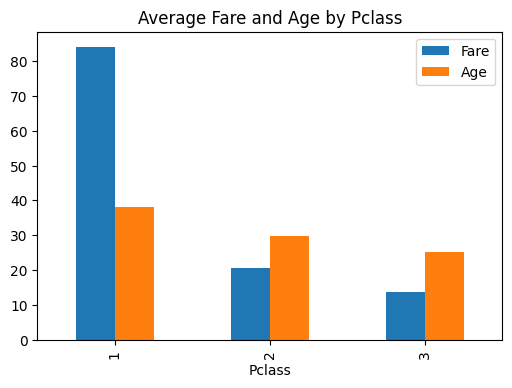

In [ ]:
from sklearn.decomposition import PCA

# Keep numeric columns
numeric_df = df[['Age', 'Fare', 'SibSp', 'Parch']].dropna()

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)
print("Explained Variance:", pca.explained_variance_ratio_)

# Aggregation by class
agg_df = df.groupby('Pclass')[['Fare', 'Age']].mean()
print(agg_df)

# Plotting
agg_df.plot(kind='bar', title='Average Fare and Age by Pclass', figsize=(6,4))


# Exercise 5: Normalizing Superstore Sales Data
Dataset: Superstore Sales Data
(Download from Kaggle or use a local CSV)

In [ ]:
import kagglehub


In [ ]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

In [ ]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [ ]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Ensure correct column types
df[['Sales', 'Profit']] = df[['Sales', 'Profit']].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=['Sales', 'Profit'], inplace=True)

# Min-Max Normalization
scaler = MinMaxScaler()
df['Sales_normalized'] = scaler.fit_transform(df[['Sales']])
df['Profit_normalized'] = scaler.fit_transform(df[['Profit']])

print(df[['Sales', 'Sales_normalized', 'Profit', 'Profit_normalized']].head())


      Sales  Sales_normalized    Profit  Profit_normalized
0  261.9600          0.011552   41.9136           0.442794
1  731.9400          0.032313  219.5820           0.454639
2   14.6200          0.000626    6.8714           0.440458
3  957.5775          0.042280 -383.0310           0.414464
4   22.3680          0.000968    2.5164           0.440168


#Exercise 6: Aggregating Air Quality Data

Dataset: city_day (CSV format with date + pollution levels):

In [9]:
import pandas as pd

In [12]:

df6 = pd.read_csv('city_day.csv')

In [13]:
df6.columns.tolist()

['City',
 'Date',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI',
 'AQI_Bucket']

In [14]:
print(df6.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [20]:
# Convert date
df6['Date'] = pd.to_datetime(df6['Date'])

# Create month column
df6['Month'] = df6['Date'].dt.to_period('M')

# Group by location and month
monthly_avg = df6.groupby(['City', 'Month'])[['PM2.5', 'PM10', 'NO2']].mean().reset_index()

print(monthly_avg.head())


        City    Month       PM2.5  PM10        NO2
0  Ahmedabad  2015-01   82.682500   NaN  26.846774
1  Ahmedabad  2015-02  116.101600   NaN  31.315200
2  Ahmedabad  2015-03  110.469333   NaN  27.937333
3  Ahmedabad  2015-04  101.682000   NaN  20.754000
4  Ahmedabad  2015-05   74.919355   NaN  17.325806


Optional plot

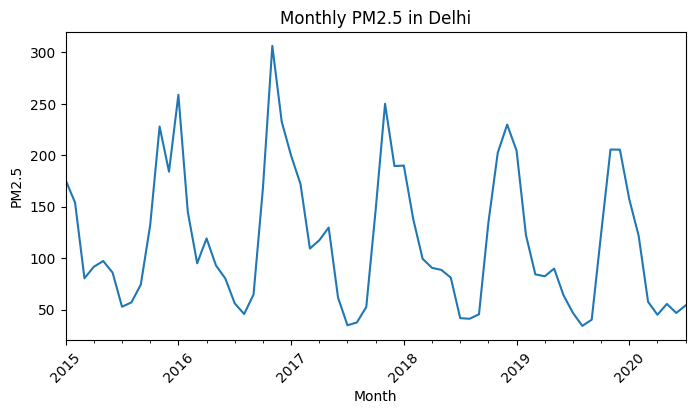

In [21]:
import matplotlib.pyplot as plt

# Example: PM2.5 trends for a location
city_data = monthly_avg[monthly_avg['City'] == 'Delhi']
city_data.set_index('Month')['PM2.5'].plot(title='Monthly PM2.5 in Delhi', figsize=(8,4))
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.show()


Summary table

| Exercise | Task                              | Tools                            |
| -------- | --------------------------------- | -------------------------------- |
| 1        | Normalize Titanic (`Age`, `Fare`) | `StandardScaler`, `MinMaxScaler` |
| 2        | Create `FamilySize`, `IsAlone`    | `pandas`                         |
| 3        | Normalize + visualize             | `matplotlib`, `sklearn`          |
| 4        | PCA + aggregation                 | `PCA`, `groupby`                 |
| 5        | Normalize E-Commerce data         | `MinMaxScaler`                   |
| 6        | Aggregate air quality by month    | `groupby`, `periods`             |
